## Проект по теме "Прогнозирование наличия сердечно-сосудистых заболеваний на основе характеристик пациентов"

Датасет представляет собой .csv файл, содержащий следующие поля:

* id: идентификатор для каждого человека в наборе данных;
* age: возраст человека (в днях);
* gender: пол (1 для женщин, 2 для мужчин);
* height: рост в сантиметрах;
* weight: вес в килограммах;
* ap_hi: систолическое артериальное давление (измеряется в мм рт.ст.);
* ap_lo: диастолическое артериальное давление (измеряется в мм рт.ст.);
* cholesterol: уровень холестерина (1 – в норме, 2 – выше нормы, 3 –
значительно выше нормы);
* gluc: уровень глюкозы (1 – в норме, 2 – выше нормы, 3 – значительно выше
нормы);
* smoke: курит ли человек (0 – нет, 1 – да);
* alco: употребляет ли человек алкоголь (0 – нет, 1 – да);
* active: является ли человек физически активным (0 – нет, 1 – да);
* cardio: наличие сердечно-сосудистых заболеваний (0 – нет, 1 – да).

Задачей является построить модель, предсказывающую наличие сердечно-сосудистых заболеваний.
Вам необходимо реализовать все дальнейшие шаги, обучить модель и оценить её качество.

## Задание 1: загрузка файла и проверка пропущенных значений (5 баллов)

Откройте данные и изучите их: есть ли пропущенные значения? Прокомментируйте результат. Если пропущенные значения есть - удалите строки с ними.

In [1178]:
# работа с данными
import pandas as pd
import numpy as np

# визуализация данных
import seaborn as sns
import matplotlib.pyplot as plt

# машинное обучение
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [1179]:
df = pd.read_csv("cvd.csv") # загружаем данные с репозитория

In [1180]:
df.shape # смотрим размерность

(70000, 13)

In [1181]:
df.head(10) #первые 10 значений шапки датасета

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [1182]:
df.info() # сводная информация по датасету

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [1183]:
# установим пакет дял визуального анализа пропусков
!pip install missingno
import missingno


<Axes: >

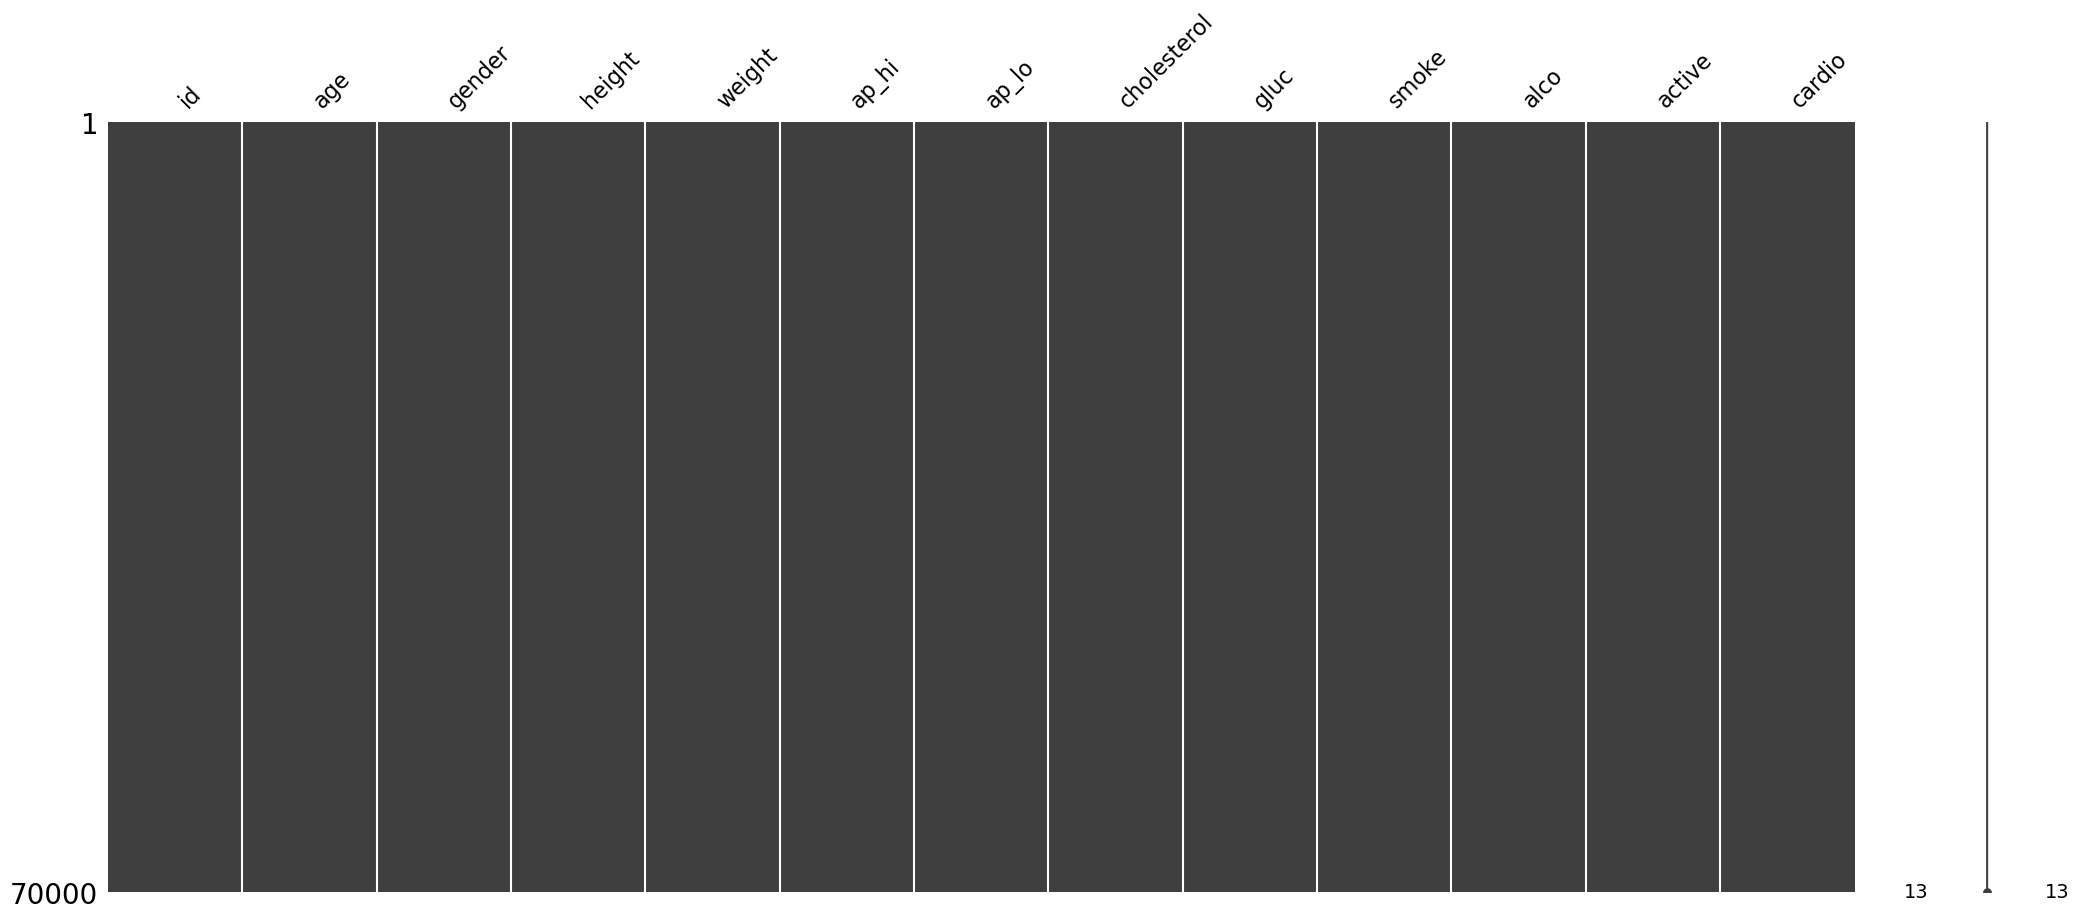

In [1184]:
missingno.matrix(df) #визуальный анализ на пропуски

In [1185]:
# проверка пропусков 
missing_values_summary = df.isnull().sum()

# саммари
missing_values_summary

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [1186]:
# проверка на дубликаты
df.duplicated().sum()

0

### В наборе нет пропущенных значений и дубликатов, можем продолжить работать

In [1187]:
df.describe().transpose() #беглый обзор на данные

,count,mean,std,min,25%,50%,75%,max
id,70000.0,49972.419900,28851.302323,0.0,25006.75,50001.5,74889.25,99999.0
age,70000.0,19468.865814,2467.251667,10798.0,17664.00,19703.0,21327.00,23713.0
gender,70000.0,1.349571,0.476838,1.0,1.00,1.0,2.00,2.0
height,70000.0,164.359229,8.210126,55.0,159.00,165.0,170.00,250.0
weight,70000.0,74.205690,14.395757,10.0,65.00,72.0,82.00,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.00,120.0,140.00,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.00,80.0,90.00,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.00,1.0,2.00,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.00,1.0,1.00,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.00,0.0,0.00,1.0


# Как видим, есть проблемы:
 1. age как минимум нужно выровнять, среднее 19468?
 2. пол можно выправить на 1 или 0 для бинарного отображения
 3. рост, вес требует рассмотрения на вопрос выбросов, это будет влиять на всё модель
 4. АД и верхнее и нижнее имеет очевидные выбросы
 5. холестерин требует перевод в dummy переменную он сдвинет корреляционно модель, так как явно эти показатели рангового типа
 6. глюкоза аналогично
 7. курение бинарный признак
 8. алкоголь бинарный
 9. активность бинарный
 10. таргет переменная cardio

In [1188]:
df.drop(columns='id', inplace=True) # удаляем столбец id 

In [1189]:
df_pre = df.copy() # создадим копию для преобработки данных

In [1190]:
from sklearn.preprocessing import MinMaxScaler #преобразуем странные значения возраста в норамльный вид, без потери информативности

scaler = MinMaxScaler(feature_range=(0,100))

df_pre['age'] = scaler.fit_transform(df_pre[['age']])


In [1191]:
df_pre['gender'] = df_pre['gender'].apply(lambda x: 0 if x == 1 else 1) #преобразуем в бинарный вид признак пола

In [1192]:
def replace_outliers(column): # функция, чтобы выровнять выбросы для 'height', 'weight', 'ap_hi', 'ap_lo'
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 6 * IQR # коэфициент нужно подобрать, чтобы верхняя граница была адекватной и физиологичной после функции
    return column.apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))
    
col_pre = ['height', 'weight', 'ap_hi', 'ap_lo']  # подадим список интересующих нас столбцов
df_pre[col_pre] = df_pre[col_pre].apply(replace_outliers)

1. 'height' разброс от 142 до 236 см возможен, иметь другие границы,то выбросы сдвинут результат модели
2. 'weight' бывают, конечно веса более 3 центнеров, но скорее выше значения 185 - это выброс
3. 'ap_hi' включаем логику, верхнее АД выше 260 точно выброс, либо пациенту нужна экстренная помощь
4. 'ap_lo' аналогично ниже 55 будет утягивать и показатели верхнего АД, опираемся на логику физиологии

In [1193]:
## перевод категориальные переменные в тип Object
# задаем вручную список категориальных переменных
cat_list = ([
  'cholesterol', 
  'gluc'
  ])

# циклом переводим в тип object
for elem in cat_list:
  df_pre[elem] = df_pre[elem].astype(object)

In [1194]:
df_mod = pd.get_dummies(
    df_pre,
    columns=cat_list,
    dtype='int',
    drop_first=True
)

In [1195]:
df_mod.describe().transpose() 

,count,mean,std,min,25%,50%,75%,max
age,70000.0,67.137947,19.103768,0.0,53.162989,68.950832,81.525358,100.0
gender,70000.0,0.349571,0.476838,0.0,0.000000,0.000000,1.000000,1.0
height,70000.0,164.420157,7.869652,142.5,159.000000,165.000000,170.000000,236.0
weight,70000.0,74.209398,14.380108,39.5,65.000000,72.000000,82.000000,184.0
ap_hi,70000.0,126.999586,17.415311,90.0,120.000000,120.000000,140.000000,260.0
ap_lo,70000.0,82.517743,12.084972,65.0,80.000000,80.000000,90.000000,150.0
smoke,70000.0,0.088129,0.283484,0.0,0.000000,0.000000,0.000000,1.0
alco,70000.0,0.053771,0.225568,0.0,0.000000,0.000000,0.000000,1.0
active,70000.0,0.803729,0.397179,0.0,1.000000,1.000000,1.000000,1.0
cardio,70000.0,0.499700,0.500003,0.0,0.000000,0.000000,1.000000,1.0


## Такие показатели являются физиологичными, теперь после предобработки можно продолжить

## Задание 2: проверка данных на мультиколлинеарность (15 баллов)

**2.1** Данные обязательно необходимо проверить на мультиколлинеарность: линейную взаимосвязь между признаками. Сначала проверим наличие чистой мультиколлинеарности. Для того, чтобы её идентифицировать - для начала посчитайте ранг для матрицы корреляций и ее определитель. Какой вывод можно сделать?

In [1196]:
# Предобработанный датасет смотрим в коррелиационной матрице
correlation_matrix = df_mod.corr()

# Смотрим ранг и детерминант матрицы корреляции
rank = np.linalg.matrix_rank(correlation_matrix)
determinant = np.linalg.det(correlation_matrix)

rank, determinant

(14, 0.1318566713105108)

1. *Ранг равен 14, соотносится количеству признаков после предобработки, линейно зависимых признаков значит нет*
2. *Детерминант матрицы не равен нулю, значит признаки линейно независимы*

**2.2** Теперь проверьте мультиколлинеарность с помощью матрицы корреляций. Какие выводы можно сделать?

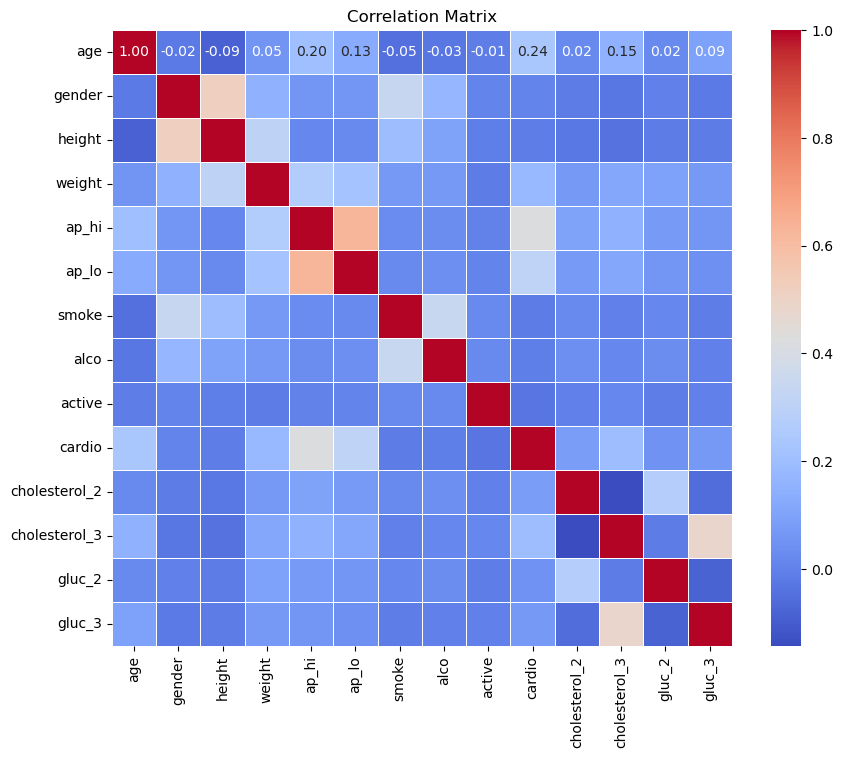

In [1197]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

1. Ярко выраженной линейной зависимости нет
2. физиологически очевидные признаки верхнее и нижнее давление имеет взаимосвязь, рост зависит от пола, а курение нередко ассоциировно с алкоголем, высоки показатель глюкозы и соотвественно высокий показатель холетерина 
3. по матрице можно сделать умеренные выводы о зависимости признаков, но мультиколлеарности здесь не наблюдается 

## Задание 3. Стандартизация (15 баллов)

Разделите данные на два массива: в переменную **Х** запишите массив признаков, а в переменную **y** - целевую переменную (cardio). Стандартизируйте массив признаков без использования готовых функций для стандартизации.

In [1198]:
X = df_mod.drop(columns=['cardio'])
y = df_mod['cardio']

In [1199]:
X_standrd = (X - X.mean()) / X.std()
X_standrd.head()

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cholesterol_2,cholesterol_3,gluc_2,gluc_3
0,-0.436058,1.364045,0.454892,-0.849048,-0.976129,-0.208337,-0.310877,-0.238383,0.494164,-0.397442,-0.360879,-0.282982,-0.287113
1,0.307684,-0.733103,-1.069953,0.750384,0.746493,0.619137,-0.310877,-0.238383,0.494164,-0.397442,2.770973,-0.282982,-0.287113
2,-0.247995,-0.733103,0.073681,-0.709967,0.172286,-1.035811,-0.310877,-0.238383,-2.023592,-0.397442,2.770973,-0.282982,-0.287113
3,-0.748147,1.364045,0.581963,0.541762,1.320701,1.446611,-0.310877,-0.238383,0.494164,-0.397442,-0.360879,-0.282982,-0.287113
4,-0.808538,-0.733103,-1.069953,-1.266291,-1.550336,-1.449548,-0.310877,-0.238383,-2.023592,-0.397442,-0.360879,-0.282982,-0.287113


Вычислите длину всех векторов - признаков. Прокомментируйте результат.

In [1200]:
# Вычисление длины (нормы) каждого вектора признаков
vector_len = np.linalg.norm(X_standrd, axis=0)

# Вывод длин векторов
print(vector_len)

[264.57324128 264.57324128 264.57324128 264.57324128 264.57324128
 264.57324128 264.57324128 264.57324128 264.57324128 264.57324128
 264.57324128 264.57324128 264.57324128]


> Нормализация помогает в масштабировании огромных значений данных в разумный числовой диапазон, чтобы меньшие значения не подавлялись большими в алгоритмах обучения модели. Это делает алгоритмы машинного обучения менее чувствительными к масштабу характеристик

*цифры одинаковы и длины векторов соответственно - это значит, что стандартизация сработала*

## Задание 4. Решение задачи классификации. (20 баллов)

**4.1** Теперь приступим непосредственно к решению задачи классификации. Обучите наивный байесовский классификатор. Предварительно выберите один из его видов: поясните свой выбор.

In [1201]:
from sklearn.naive_bayes import GaussianNB

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_standrd, y, test_size=0.2, random_state=42)

# Инициализация
gaussian_nb = GaussianNB()

# обучаем
gaussian_nb.fit(X_train, y_train)

# Прогноз на тестовой выборке
y_pred = gaussian_nb.predict(X_test)

# Оценка точности
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.68


>Sklearn предоставляет 5 типов наивных байесовских алгоритмов:
- GaussianNB - наиболее подходящий вариант, 
- КатегориальныйNB
- BernoulliNB
- MultinomialNB
- ComplementNB

**4.2** Оцените полученное качество и проинтерпретируйте полученный результат. Не забудьте разделить выборку на обучающую и тестовую части.

In [1202]:
from sklearn.metrics import classification_report, accuracy_score

print("Accuracy Score : {:.3f}".format(accuracy_score(y_test, y_pred)))
print("\nClassification Report :")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy Score : 0.682

Classification Report :
              precision    recall  f1-score   support

           0       0.64      0.81      0.72      6988
           1       0.75      0.55      0.64      7012

    accuracy                           0.68     14000
   macro avg       0.69      0.68      0.68     14000
weighted avg       0.70      0.68      0.68     14000


Confusion Matrix:
 [[5662 1326]
 [3126 3886]]


In [1203]:
pip install scikit-plot


Note: you may need to restart the kernel to use updated packages.


<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

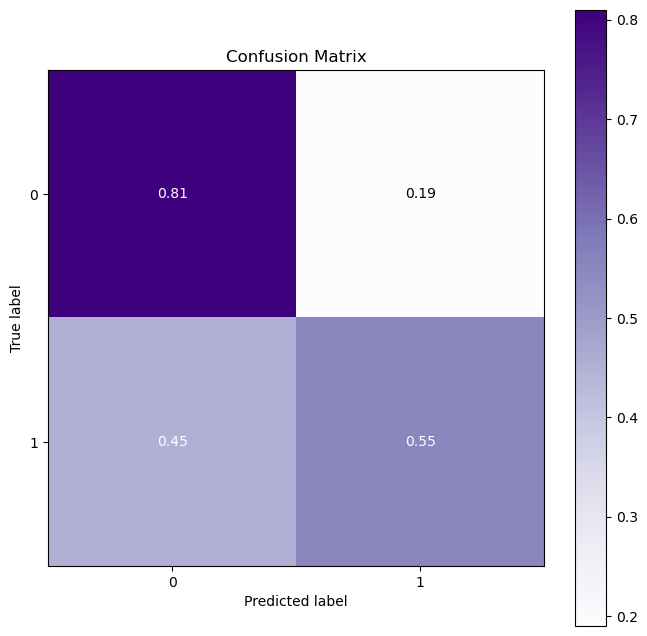

In [1204]:
import scikitplot as skplt
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
skplt.metrics.plot_confusion_matrix(y_test, y_pred,
                                    normalize=True,
                                    title="Confusion Matrix",
                                    cmap="Purples",
                                    ax=ax
                                    )

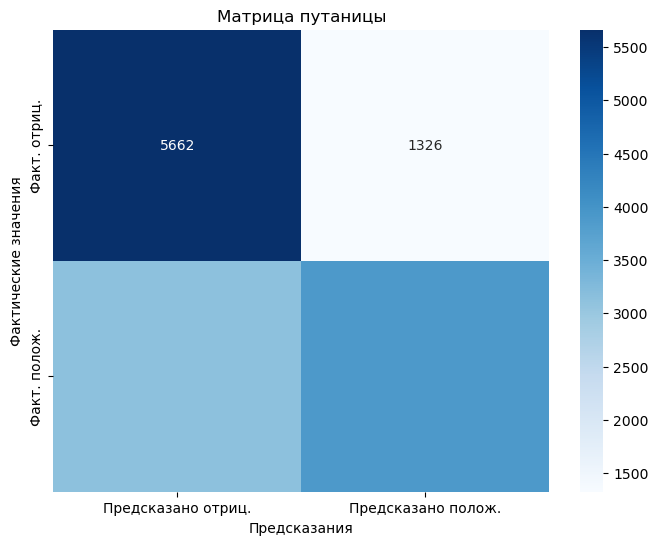

In [1219]:
# Матрица путаницы
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Предсказано отриц.', 'Предсказано полож.'], yticklabels=['Факт. отриц.', 'Факт. полож.'])
plt.title('Матрица путаницы')
plt.xlabel('Предсказания')
plt.ylabel('Фактические значения')
plt.show()

## Точность модели составляет 68%, возможно корректировка гиперпараметров модели или дополнительная преобработка данных выправят результат 

## Задание 5: Решающее дерево (25 баллов)

Теперь решите задачу классификации с помощью обучающего дерева.

**5.1** Обучите дерево, не задавая никакие гиперпараметры. Выведите получившиеся гиперпараметры. Какое получилось качество? Сравните результат с предыдущей моделью.

In [1205]:
from sklearn.tree import DecisionTreeClassifier


# Инициализация модели дерева решений с параметрами по умолчанию
tree = DecisionTreeClassifier(random_state=42)

# Обучение модели
tree.fit(X_train, y_train)

# Прогноз на тестовой выборке
y_pred_tree = tree.predict(X_test)

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

print("Accuracy Score : {:.2f}".format(accuracy_score(y_test, y_pred)))
print(f'Decision Tree Parameters: {tree.get_params()}')
print("\nClassification Report :")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy Score : 0.68
Decision Tree Parameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}

Classification Report :
              precision    recall  f1-score   support

           0       0.64      0.81      0.72      6988
           1       0.75      0.55      0.64      7012

    accuracy                           0.68     14000
   macro avg       0.69      0.68      0.68     14000
weighted avg       0.70      0.68      0.68     14000


Confusion Matrix:
 [[5662 1326]
 [3126 3886]]


### совпадает полностью

**5.2** Подберите оптимальные гиперпараметры с помощью перебора по сетке. Обучите дерево с оптимальными гиперпараметрами. Изменилось ли качество?

In [1214]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Задаем параметры для поиска по сетке
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Инициализация дерева решений
tree_clf = DecisionTreeClassifier(random_state=42)

# Настройка поиска по сетке
grid_search = GridSearchCV(tree_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Обучение на тренировочной выборке
grid_search.fit(X_train, y_train)

# Вывод оптимальных параметров
print(f'Лучшие гиперпараметры: {grid_search.best_params_}')

# Обучение модели с оптимальными параметрами
best_tree_clf = grid_search.best_estimator_

# Прогноз на тестовой выборке
y_pred_best_tree = best_tree_clf.predict(X_test)

# Оценка точности
accuracy_best_tree = accuracy_score(y_test, y_pred_best_tree)
print(f'Accuracy with optimal parameters: {accuracy_best_tree:.4f}')

# Дополнительные метрики
print("\nClassification Report for Optimal Decision Tree:\n", classification_report(y_test, y_pred_best_tree))
print("\nConfusion Matrix for Optimal Decision Tree:\n", confusion_matrix(y_test, y_pred_best_tree))


Лучшие гиперпараметры: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy with optimal parameters: 0.7346

Classification Report for Optimal Decision Tree:
               precision    recall  f1-score   support

           0       0.71      0.79      0.75      6988
           1       0.76      0.68      0.72      7012

    accuracy                           0.73     14000
   macro avg       0.74      0.73      0.73     14000
weighted avg       0.74      0.73      0.73     14000


Confusion Matrix for Optimal Decision Tree:
 [[5506 1482]
 [2234 4778]]


<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

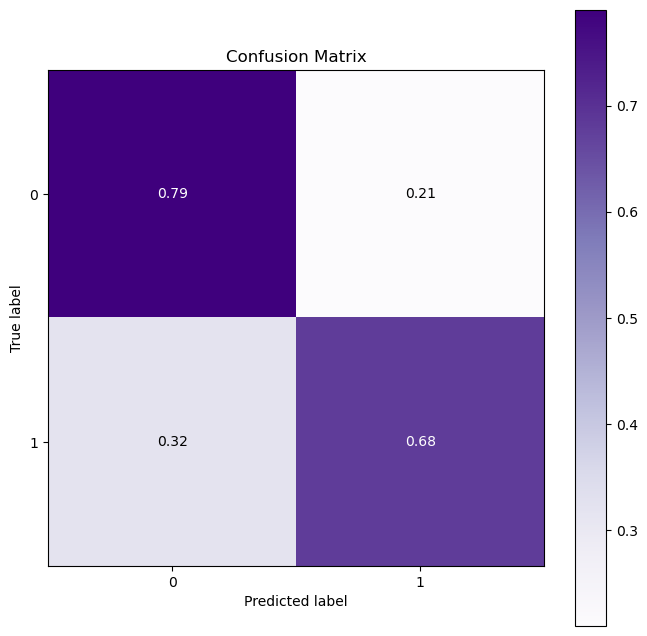

In [1216]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
skplt.metrics.plot_confusion_matrix(y_test, y_pred_best_tree,
                                    normalize=True,
                                    title="Confusion Matrix",
                                    cmap="Purples",
                                    ax=ax
                                    )

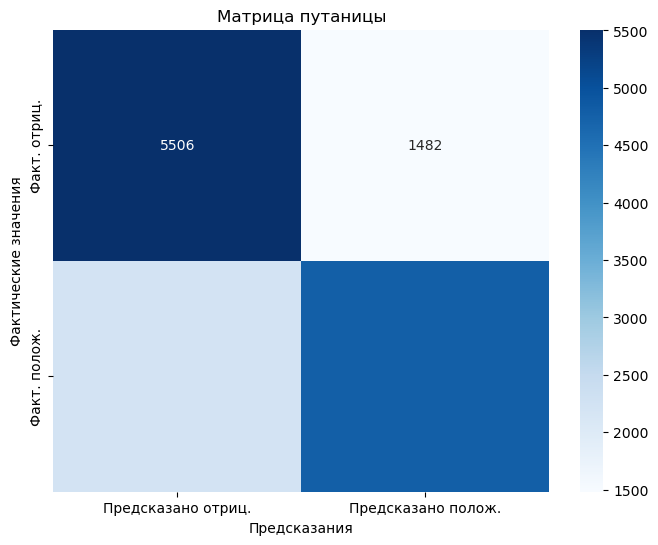

In [1223]:
# Матрица путаницы
conf_matrix = confusion_matrix(y_test, y_pred_best_tree)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Предсказано отриц.', 'Предсказано полож.'], yticklabels=['Факт. отриц.', 'Факт. полож.'])
plt.title('Матрица путаницы')
plt.xlabel('Предсказания')
plt.ylabel('Фактические значения')
plt.show()

**5.3** Выведите важность признаков. Какие три признака самые важные? Прокомментируйте результат.


Полный список важности признаков:
          Признак  Важность
4           ap_hi  0.776876
0             age  0.132501
10  cholesterol_3  0.069113
12         gluc_3  0.006879
5           ap_lo  0.005070
9   cholesterol_2  0.003778
3          weight  0.002642
8          active  0.001542
6           smoke  0.000867
2          height  0.000733
1          gender  0.000000
7            alco  0.000000
11         gluc_2  0.000000


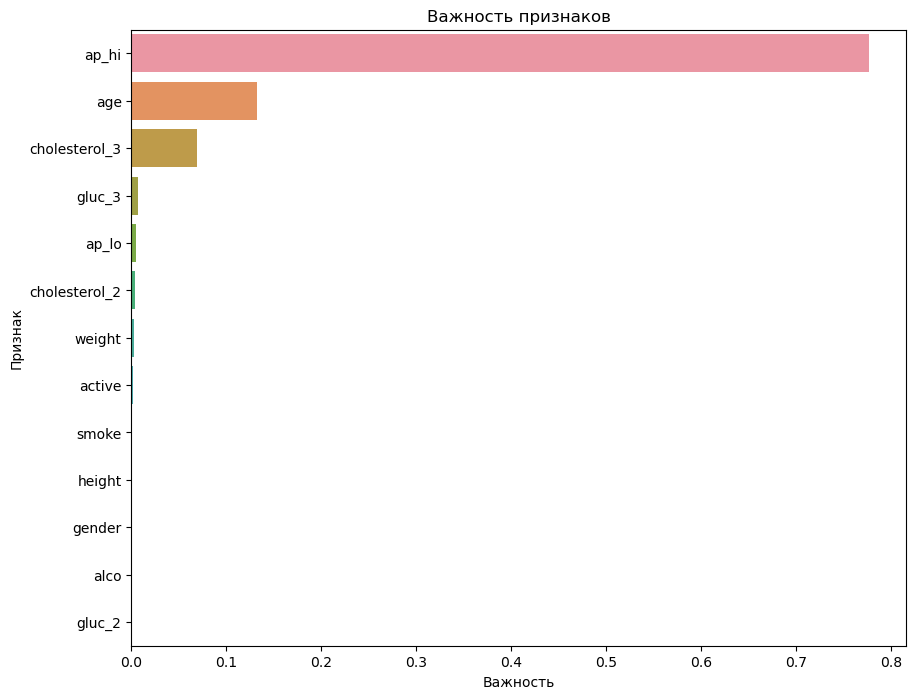

In [1226]:
# Важность признаков
importances = best_tree_clf.feature_importances_
feature_names = X.columns

feature_importances = pd.DataFrame({'Признак': feature_names, 'Важность': importances})
feature_importances = feature_importances.sort_values(by='Важность', ascending=False)

# Вывод всех признаков и их важности
print("\nПолный список важности признаков:")
print(feature_importances)

plt.figure(figsize=(10, 8))
sns.barplot(x='Важность', y='Признак', data=feature_importances)
plt.title('Важность признаков')
plt.show()

## Логичный вывод модели, что крайне важным параметром является повышенное артериальное давление, это и нагрузка почек, лёгких и нарушение фактическое работы надпочечников, что эпмперически подтверждает эффективность препаратов от гипертонии (ингибиторы АПФ например), возраст естественная причина угасания здоровья, угасания ренин-ангиотензиновой регуляции, но 3 и 4 место занимает повышенные показатели холестерина и глюкозы, сахар вообще разрушает стенки сосудов, а в тромбировнных участках поврежденных им сосудов формируются холестериновые бляшки

## Задание 6: Случайный лес и градиентный бустинг (20 баллов)

Осталось применить ансамблевые методы!

**6.1** Используйте случайный лес: без настройки и с подробом гиперпараметров по сетке. Какое качество получается в ситуации оптимальных гиперпараметров? Какие признаки самые важные? Сравнение результат с простым решающим деревом.

In [1231]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [1233]:
# Оценка точности
accuracy_rf = accuracy_score(y_test, y_pred)
print(f'Accuracy with optimal parameters: {accuracy_rf:.4f}')

# Дополнительные метрики
print("\nClassification Report for Optimal Decision Tree:\n", classification_report(y_test,y_pred))
print("\nConfusion Matrix for Optimal Decision Tree:\n", confusion_matrix(y_test,y_pred))

Accuracy with optimal parameters: 0.7124

Classification Report for Optimal Decision Tree:
               precision    recall  f1-score   support

           0       0.71      0.72      0.71      6988
           1       0.72      0.70      0.71      7012

    accuracy                           0.71     14000
   macro avg       0.71      0.71      0.71     14000
weighted avg       0.71      0.71      0.71     14000


Confusion Matrix for Optimal Decision Tree:
 [[5040 1948]
 [2078 4934]]


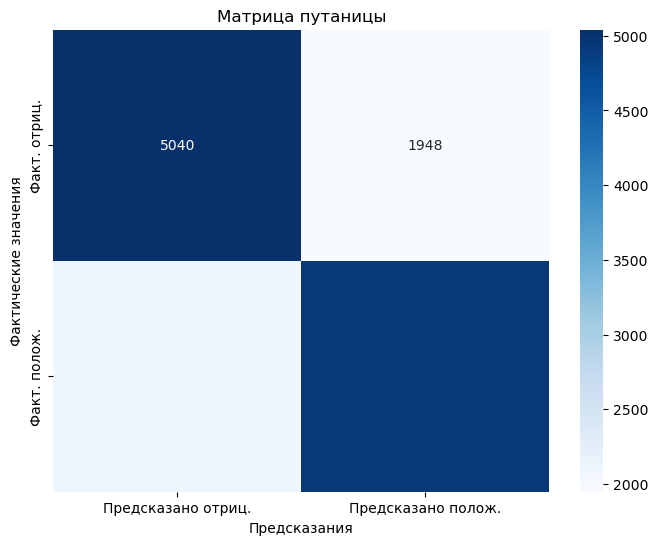

In [1234]:
# Матрица путаницы
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Предсказано отриц.', 'Предсказано полож.'], yticklabels=['Факт. отриц.', 'Факт. полож.'])
plt.title('Матрица путаницы')
plt.xlabel('Предсказания')
plt.ylabel('Фактические значения')
plt.show()

In [1237]:
# Улучшение модели с помощью GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred_best = best_model.predict(X_test)
best_accuracy = accuracy_score(y_test, y_pred_best)
best_precision = precision_score(y_test, y_pred_best)
best_recall = recall_score(y_test, y_pred_best)
best_f1 = f1_score(y_test, y_pred_best)
best_roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])

print(f'Лучшая точность: {best_accuracy}')
print(f'Лучшая прецизионность: {best_precision}')
print(f'Лучшая полнота: {best_recall}')
print(f'Лучший F1 Счет: {best_f1}')
print(f'Лучший ROC AUC Счет: {best_roc_auc}')

KeyboardInterrupt: 

In [1211]:
# ваш комментарий

**6.2** Аналогичные операции реализуйте для градиентного бустинга. Попробуйте хотя бы две разных реализации градиентного бустинга. Сравните итоговое качество со случайным деревом.

In [1212]:
# ваш код

In [1213]:
# ваш комментарий